In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
# Load the data and show the info and contents:
data = pd.read_csv("files/ClearnedBusCardType.csv")


In [3]:
data.head()

,Date,Date2,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
0,16-Jul,201607,390433,62800,136064,0,1149,138642,206110,0,0,0,0,935198
1,16-Aug,201608,386386,67010,73590,0,1281,296261,224668,0,0,0,0,1049196
2,16-Sep,201609,370068,70022,61676,0,1320,203827,218598,0,0,0,0,925511
3,16-Oct,201610,381402,78951,60635,0,1410,197558,227088,0,0,0,0,947044
4,16-Nov,201611,405245,76328,57858,0,1462,255994,236965,0,0,0,0,1033852


In [4]:
data.tail()

,Date,Date2,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
57,21-Apr,202104,271849,52658,36117,1944,1353,69598,176368,8887,101192,1,99,720066
58,21-May,202105,289229,42457,42044,1967,1329,132272,183225,10133,106754,0,147,809557
59,21-Jun,202106,259924,34715,32919,1314,1081,102099,163825,9366,97027,0,95,702365
60,21-Jul,202107,127354,11205,10461,513,488,1276,75935,0,48652,0,79,275963
61,21-Aug,202108,102883,6708,7436,480,389,1501,63463,0,39328,1,81,222270


In [5]:
data.shape

(62, 14)

<AxesSubplot:xlabel='Date'>

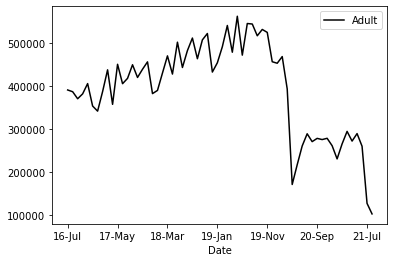

In [6]:
data.plot.line(x='Date',y='Adult', c='Black')

In [7]:
train, test = train_test_split(data, test_size=0.27, random_state=142)
print(train.shape)
print(test.shape)

(45, 14)
(17, 14)


In [42]:
x_train = train[['Date2','Child/Youth']]
y_train = train['Adult']

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [54.33711405  4.56191094] + -10897123.60698061


In [43]:
predicted = reg.predict(x_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 2305381089.7707624
R Squared: 0.7981222639196208
